# Spectral Index Maps
- **Author:** Geferson Lucatelli (gefersonlucatelli@gmail.com)
- **Affiliation:** University of Manchester, JBCA
- **Created on:** January, 2025

##### Additional Information
See [spec_maps.md](spec_maps.md)

## Imports

In [1]:
import sys
import os
try:
    sys.path.append('../../../../morphen/morphen/')
    sys.path.append('../../../../morphen/morphen/analysis_scripts/')
    import morphen as mp
    import mlibs as mlibs
except:
    morphen_path = '../morphen/'
    sys.path.append(morphen_path)
    sys.path.append(morphen_path+'analysis_scripts/')
    import morphen as mp
    import mlibs as mlibs


import numpy as np
import warnings
import casaviewer


warnings.filterwarnings("ignore", category=RuntimeWarning)

def reload_libs():
    """
    This allows you to reload the library file without restarting the kernel.
    
    Usage:
    In [1]: reload_libs()
    """
    import mlibs as mlibs
    from importlib import reload
    reload(mlibs)
    import morphen as mp
    reload(mp)


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
       Morphen                |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

## Load Data
First, let us load the imaging data that we need. In this case, we are going to use images that 
are already $uv$ and beam-matched. 

Each line in `root_path` below refers to a particular observing band, having sub-band images from WSClean.

The list `prefix_images` will contain the desired prefix of the images in each case. 


Providing `root_path` and `prefix_images` to the function `mlibs.prepare_data` will return the corresponding image and residual lists (for sub-band images and also for the MFS images).


In [2]:
source_name = 'Mrk331'
root_path = [
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/L/",  #0
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/S/",  #1
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/C/",  #2
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/X/",  #3
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/Ku/", #4
             "/mnt/ext10TB/LIRGI_Sample_done/for_spix/Mrk331/VLA_L_S_C_X_Ku_Ka/Ka/", #5
            ]


prefix_images = [
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r0.0*-????-image.fits",  #0
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r0.0*-????-image.fits",  #1
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r0.0*-????-image.fits",  #2
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r2.0*-????-image.fits",  #3
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r-1.0*-????-image.fits", #4
                 "im_nc3_cb_bs_1.1asec*0.04asec*_multiscale__*r2.0*-????-image.fits",  #5
                ]

MFS_images,MFS_residuals,imagelist,residuallist,freqlist_MFS,freqlist = mlibs.prepare_data(root_path,prefix_images)

0 >> im_nc3_cb_bs_1.1asec_Mrk331_A_L_sfc_uvsub_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0000-image.fits
1 >> im_nc3_cb_bs_1.1asec_Mrk331_A_L_sfc_uvsub_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0001-image.fits
2 >> im_nc3_cb_bs_1.1asec_Mrk331_A_L_sfc_uvsub_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0002-image.fits
0 >> im_nc3_cb_bs_1.1asec_MRK0331_A_S_sf_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0000-image.fits
1 >> im_nc3_cb_bs_1.1asec_MRK0331_A_S_sf_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0001-image.fits
2 >> im_nc3_cb_bs_1.1asec_MRK0331_A_S_sf_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0002-image.fits
0 >> im_nc3_cb_bs_1.1asec_Mrk331_A_C_EVLA_sfc_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0000-image.fits
1 >> im_nc3_cb_bs_1.1asec_Mrk331_A_C_EVLA_sfc_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0001-image.fits
2 >> im_nc3_cb_bs_1.1asec_Mrk331_A_C_EVLA_sfc_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-0002-image.fits
0 >> im_nc3_cb_bs_1.1asec_MRK0331_A_X_sf

100%|██████████| 6/6 [00:00<00:00, 79.89it/s]


In [3]:
freqlist/1e9

array([ 1.1675,  1.5195,  1.8715,  2.324 ,  2.998 ,  3.673 ,  4.649 ,
        5.998 ,  7.348 ,  8.649 ,  9.998 , 11.348 , 13.013 , 15.018 ,
       17.088 , 30.465 , 33.126 , 35.724 ])

In [4]:
freqlist_MFS/1e9

array([ 1.5195,  2.999 ,  5.999 ,  9.999 , 15.083 , 33.063 ])

## Inspect the image(s)

++>> Image File: im_nc3_cb_bs_1.1asec_Mrk331_A_C_EVLA_sfc_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-MFS-image.fits
++>> Residual File: im_nc3_cb_bs_1.1asec_Mrk331_A_C_EVLA_sfc_ps_lowres_2048x2048_0.04asec_multiscale__r0.0-MFS-residual.fits
-->> No PSF File was provided.
  >> Center -->  [1023 1024    0    0]


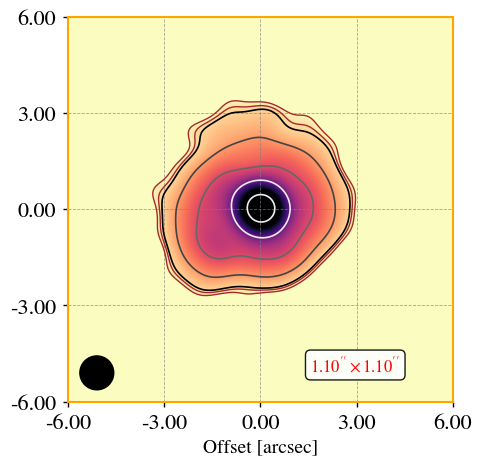

In [5]:
# lets select a specific MFS image from our list of images. 
idx = 2 #select one index from the list. 
idx_C_band = 2
cutout_size = 301
input_data=mp.read_data(filename=MFS_images[idx],
                        residualname=MFS_residuals[idx])
ax=mlibs.eimshow(input_data.filename,crop=True,box_size=int(cutout_size/2),add_beam=True)

## Perform cutouts
If ones needs to reduce the image size, we can crop the images to fit the source structure. We use the option `cutout_size` with the function `cutout_2D_radec`.

maxpos =  [1023 1024    0    0]
maxposf =  23:51:26.743, +20.35.10.300, 5.999e+09Hz, I
ra_f, dec_f =  357.86142916666665 20.586194444444445


<Axes: xlabel='Offset [arcsec]'>

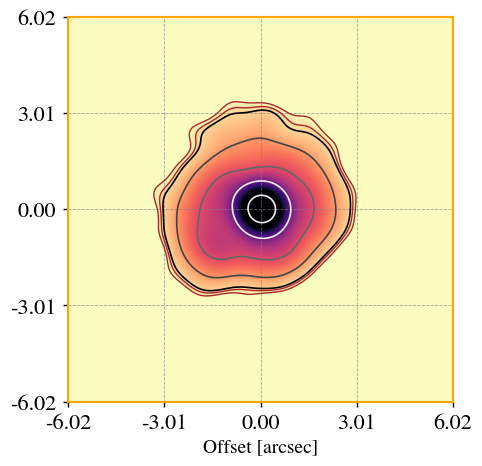

In [6]:
special_name = ''
ra,dec,new_filename = mlibs.cutout_2D_radec(imagename=input_data.filename,
                                            residualname=input_data.residualname,
                                            cutout_size = cutout_size,
                                            # pixel_coords = (1075,895),
                                            special_name=special_name)
mlibs.eimshow(new_filename)

### Correct possible shifts
When performing cutouts, we can also tell `cutout_2D_radec` if we want to correct possible shifts between images. 


Please note that this is a testing function. As of now, shifts are only well corrected using the peak brightness of a reference image.

Prior to this additional correction in the image plane, it is recommended that we had performed other kinds of astrometric checks (e.g. `phaseshift` to a common phase centre). 



In [7]:
special_name = ''
imagelist_c = []
residuallist_c = []
for i in range(len(imagelist)):
    _,_,image_c = mlibs.cutout_2D_radec(imagename=imagelist[i],
                                            residualname=residuallist[i],
                                            ra_f=ra,dec_f=dec,
                                            cutout_size = cutout_size,
                                            correct_shift=True,ref_cutout_image=new_filename,
                                            shift_correction_mode='peak',
                                            special_name=special_name)
    imagelist_c.append(image_c)
    residuallist_c.append(image_c.replace('-image.cutout.','-residual.cutout.'))
    
MFS_images_c = []
MFS_residuals_c = []
for i in range(len(MFS_images)):
    _,_,MFS_image_c = mlibs.cutout_2D_radec(imagename=MFS_images[i],
                                            residualname=MFS_residuals[i],
                                            ra_f=ra,dec_f=dec,
                                            cutout_size = cutout_size,
                                            correct_shift=True,ref_cutout_image=new_filename,
                                            shift_correction_mode='peak',
                                            special_name=special_name)
    MFS_images_c.append(MFS_image_c)
    MFS_residuals_c.append(MFS_image_c.replace('-MFS-image.cutout.','-MFS-residual.cutout.'))
    
# imagelist_2_c = mlibs.glob.glob(root_path_2+prefix_images_2.replace('-image.fits','-image.cutout.fits'))
# imagelist_2_c,residuallist_2_c = \
#     mlibs.sort_list_by_beam_size(imagelist=imagelist_2_c,return_df = False)

# MFS_images_c,MFS_residuals_c = \
#     mlibs.sort_list_by_beam_size(imagelist=MFS_images_c,return_df = False)    

        > Offset of image position is: (1, 2).
        > Offset of image position is: (1, 1).
        > Offset of image position is: (1, 2).
        > Offset of image position is: (0, -1).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (-1, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (1, 1).
        > Offset of image position is: (0, 0).
        > Offset of image position is: (0, 0).
      

In [8]:
# casaviewer.imview(MFS_images_c)

## Selection the region for the spectral index map.

Spectral index maps should be generated with a common mask, i.e. the same region/pixels for all sub-band images. 


In this example, we adopt a simple idea of using a mask from a reference MFS image. 
We are going to use the VLA-C-config Ka-band image. In general, this image will result in the smallest emission size in relation to the others (i.e. Ka band is less sensitive; and higher frequencies have fainter extended emission). 


We use the function `mlibs.mask_dilation` to create a mask above a certain threshold, and then we dilate it. 
In our case, lets start with $\sigma = 6$.


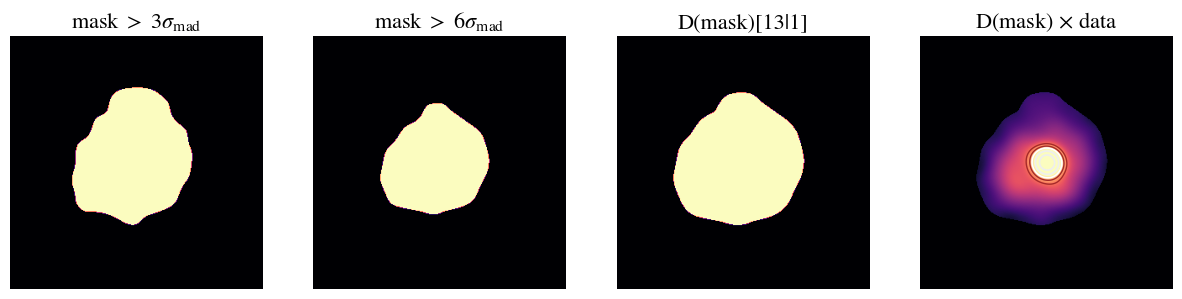

<Figure size 500x500 with 0 Axes>

In [9]:
_, ref_mask_cutout = mlibs.mask_dilation(MFS_images_c[-1], 
                              sigma=6, 
                              dilation_size=None,
                              iterations=1, show_figure=True,PLOT=True,
                              rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[-1]))
                             )

## Power law spectral index map.

The images we have in this example, are already $uv$-$\lambda$ and beam-matched, hence we can simply proceed to generate the spectral index map. 

Firstly, lets simply assume that the flux density is a power law function of the frequency, e.g. $S \propto \nu^{-\alpha}$.


The function `mlibs.specidx_map` takes as input a list of images, corresponding residuals and the frequencies. Then, it will fit a power-law spectrum to each pixel, 
using a non-linear least squares fitting algorithm. 

In [10]:
imagelist_run = imagelist_c.copy()
residuallist_run = residuallist_c.copy()
frequencies = freqlist.copy()
idx_C_band = 2

100%|██████████| 18081/18081 [00:35<00:00, 508.98it/s]


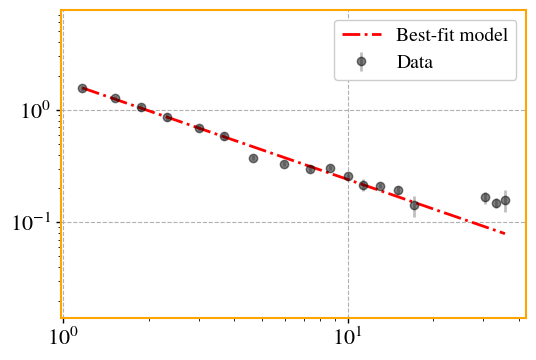

[[Variables]]
    alpha: -0.87250163 +/- 0.02628109 (3.01%) (init = -0.8725016)
    b:      0.24078797 +/- 0.01139681 (4.73%) (init = 0.240788)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.952


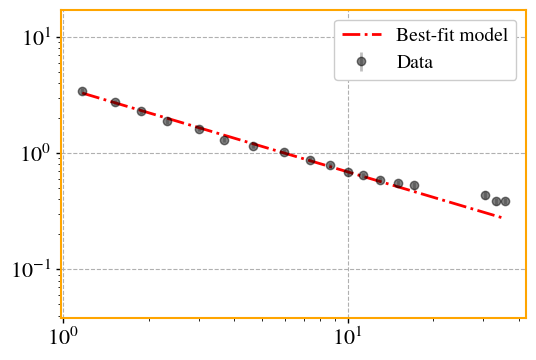

[[Variables]]
    alpha: -0.72621738 +/- 0.02106082 (2.90%) (init = -0.7262174)
    b:      0.68997385 +/- 0.02329912 (3.38%) (init = 0.6899738)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.907


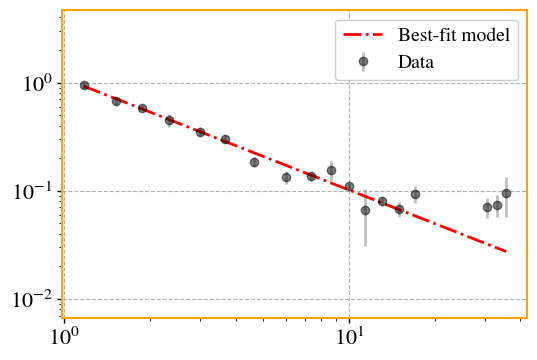

[[Variables]]
    alpha: -1.03041910 +/- 0.03381860 (3.28%) (init = -1.030419)
    b:      0.10154211 +/- 0.00631974 (6.22%) (init = 0.1015421)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.971


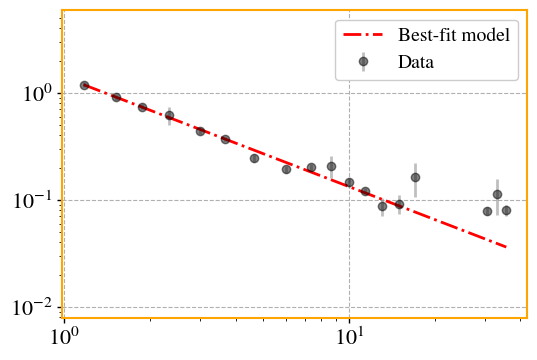

[[Variables]]
    alpha: -1.02150591 +/- 0.02625397 (2.57%) (init = -1.021506)
    b:      0.13305489 +/- 0.00655158 (4.92%) (init = 0.1330549)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.973


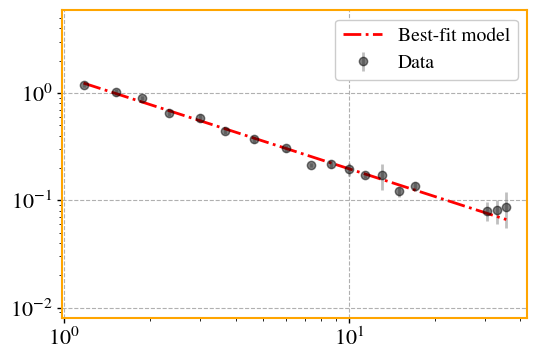

[[Variables]]
    alpha: -0.85618019 +/- 0.02616220 (3.06%) (init = -0.8561802)
    b:      0.19669481 +/- 0.00917626 (4.67%) (init = 0.1966948)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.951


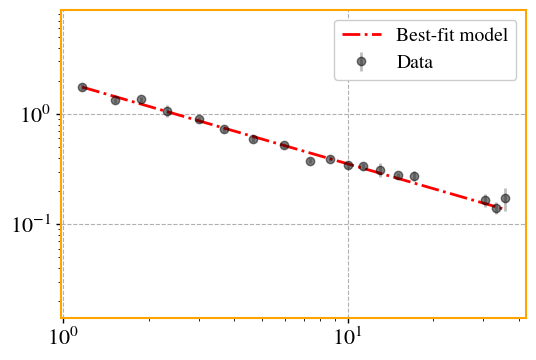

[[Variables]]
    alpha: -0.74664217 +/- 0.02501813 (3.35%) (init = -0.7466422)
    b:      0.35261342 +/- 0.01485101 (4.21%) (init = 0.3526134)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.914


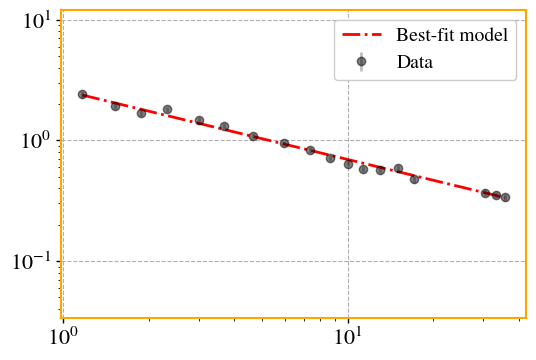

[[Variables]]
    alpha: -0.57263632 +/- 0.02361172 (4.12%) (init = -0.5726363)
    b:      0.69485634 +/- 0.02481072 (3.57%) (init = 0.6948563)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.811


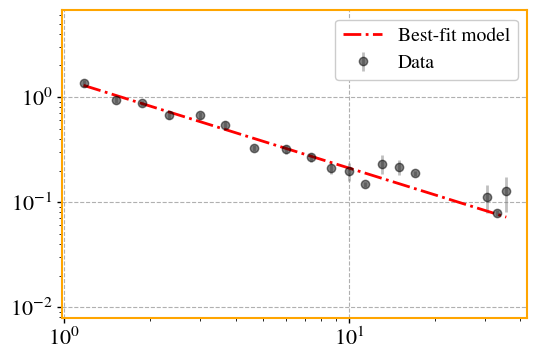

[[Variables]]
    alpha: -0.84407879 +/- 0.04362612 (5.17%) (init = -0.8440788)
    b:      0.21113762 +/- 0.01608628 (7.62%) (init = 0.2111376)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.948


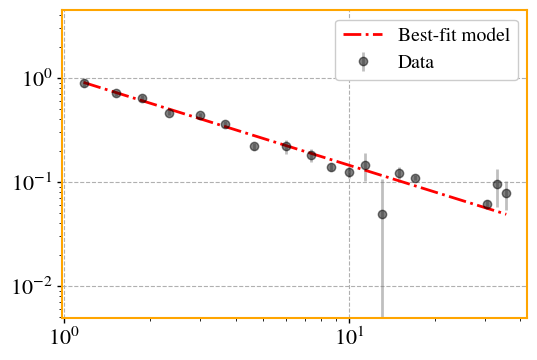

[[Variables]]
    alpha: -0.85248786 +/- 0.03441840 (4.04%) (init = -0.8524879)
    b:      0.14511217 +/- 0.00868433 (5.98%) (init = 0.1451122)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.959


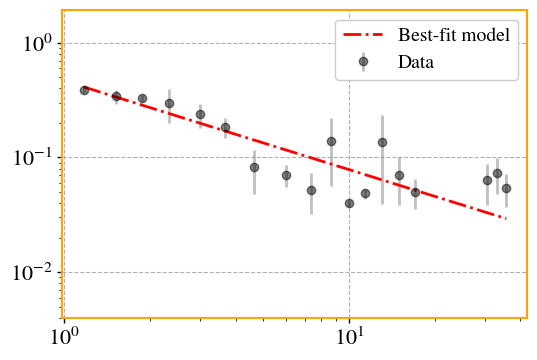

[[Variables]]
    alpha: -0.77324491 +/- 0.07402708 (9.57%) (init = -0.7732449)
    b:      0.07830700 +/- 0.01097909 (14.02%) (init = 0.078307)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, b) = 0.963


100%|██████████| 18/18 [00:00<00:00, 68.45it/s]


In [12]:
alphaimage, alphaimage_error,conv_cube,masked_cube_res,masked_cube\
    = mlibs.specidx_map(imagelist_run,residuallist_run,
                        freqs=frequencies,
                        mask=ref_mask_cutout,
                        dilation_size=None,verbose=1,
                        n_jobs=8,
                        nu0=10,
                        sigma_global_mask=6,
                       )

<Figure size 500x500 with 0 Axes>

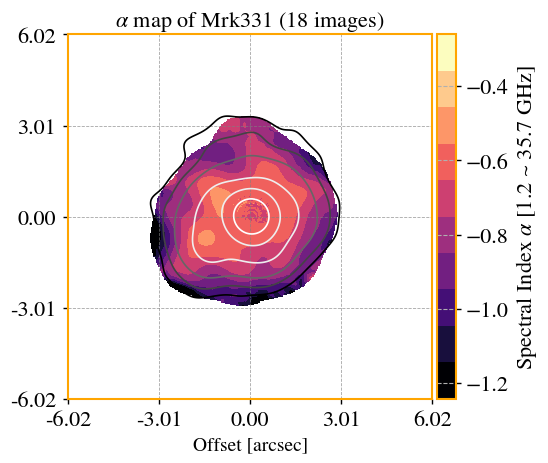

In [13]:
projection='offset'
box_size=(90,90)
crop=False

good_alpha_mask = (alphaimage_error<np.nanpercentile(alphaimage_error, 86))
good_alpha = np.where(good_alpha_mask, alphaimage, np.nan)
good_alpha_error = np.where(good_alpha_mask, alphaimage_error, np.nan)

mlibs.plot_alpha_map(alphaimage=alphaimage,
                     radio_map=MFS_images_c[idx_C_band],
                     figsize=(5,5),
                     plot_title=rf'$\alpha$ map of {source_name}',cmap='magma',
                     rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[idx_C_band])),
                     vmax=np.nanmedian(alphaimage) +3*mlibs.mad_std(alphaimage,ignore_nan=True),
                     # vmin = -1.2,
                     vmin=np.nanmedian(alphaimage) -3*mlibs.mad_std(alphaimage,ignore_nan=True),
                     projection=projection,
                     box_size=box_size,crop=crop,
                     frequencies=frequencies,
                     save_name=f'alpha_map_{source_name}_lowres.pdf'
                    )

/tmp/ipykernel_70987/3861380134.py:4: DeprecationWarning: 'ctn' is deprecated and will be removed in a future version. Use 'load_fits_data' instead.
  rms=mlibs.mad_std(mlibs.ctn(MFS_residuals_c[idx_C_band])),


<Figure size 500x500 with 0 Axes>

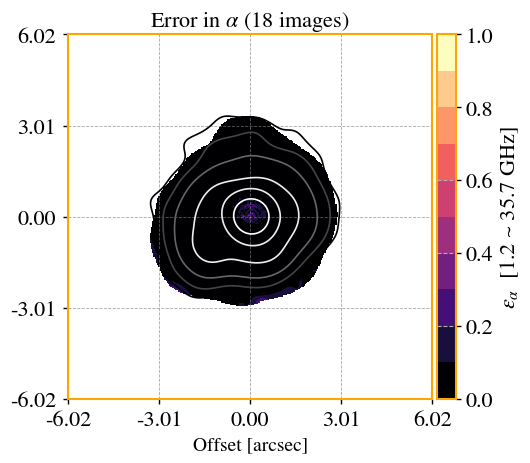

In [14]:
mlibs.plot_alpha_map(alphaimage=abs(alphaimage_error*alphaimage),figsize=(5, 5),
                     radio_map=MFS_images_c[idx_C_band],
                     plot_title=r'Error in $\alpha$',cmap='magma',
                     rms=mlibs.mad_std(mlibs.ctn(MFS_residuals_c[idx_C_band])),
                     vmin=0,vmax=1,
                     projection=projection,
                     box_size=box_size,crop=crop,
                     label_colorbar=r'$\varepsilon_{\alpha}$  ',
                     frequencies=frequencies,
                     save_name=f'alpha_error_map_{source_name}_lowres.pdf'
                    )

In [15]:
centre = mlibs.nd.maximum_position(mlibs.load_fits_data(MFS_images_c[idx_C_band]))[::-1]
cell_size = mlibs.get_cell_size(MFS_images_c[idx_C_band])

(0.0, 3.7139999999999627)

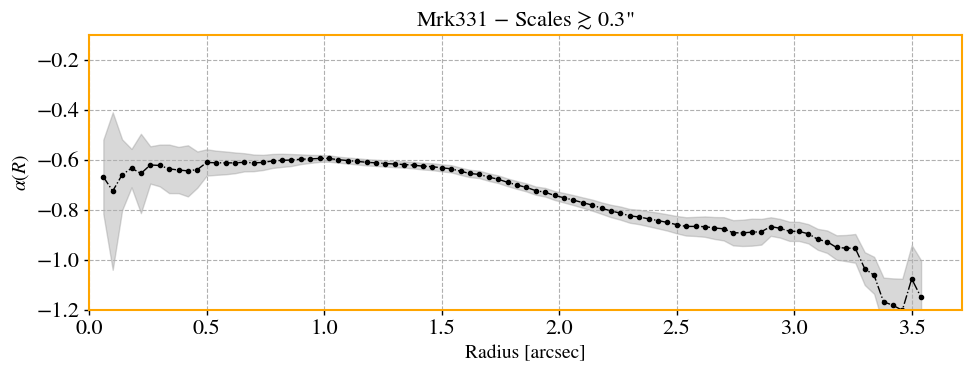

In [16]:
bin_centers, profile, error_rms, error_stdl,points_per_bin = \
    mlibs.plot_azimuthal_profile(image=alphaimage,
                                 rms_image = abs(alphaimage*alphaimage_error),
                                 center=centre,log_scale=False,
                                 cell_size=mlibs.get_cell_size(MFS_images_c[idx_C_band]),
                                 ylabel=r'$\alpha(R)$',
                                 xlabel=r'Radius [arcsec]',
                                 figsize=(10,4),
                                 sigma=1.0,
                                 which_error='rms',which_statistics='median',
                                 weight_by_points=True,
                                 r_max = 4*mlibs.area_to_radii(np.sum(ref_mask_cutout)),
                                 title=f'{source_name} $-$ Scales $\gtrsim$ 0.3"'
                                )
# mlibs.plt.ylim(-1.2,np.nanpercentile(alphaimage,99.9))
mlibs.plt.ylim(-1.2,-0.1)
mlibs.plt.xlim(0,)

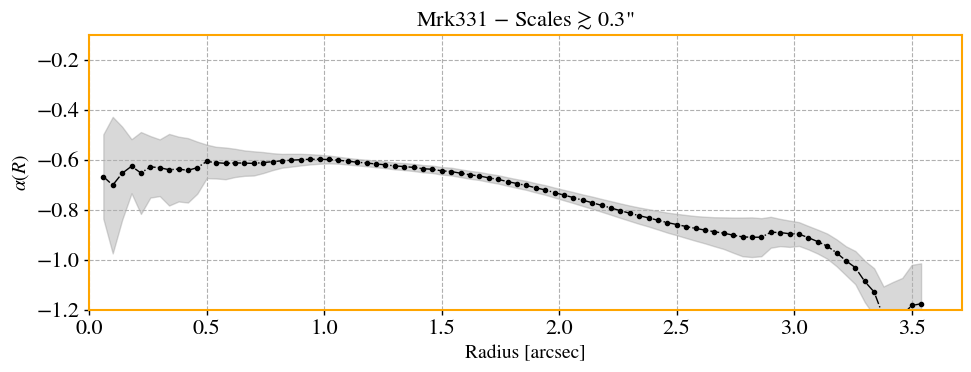

In [17]:
bin_centers, profile, error_rms, error_stdl,points_per_bin = \
    mlibs.plot_azimuthal_profile(image=alphaimage,
                                 rms_image = abs(alphaimage*alphaimage_error),
                                 center=centre,log_scale=False,
                                 cell_size=mlibs.get_cell_size(MFS_images_c[idx_C_band]),
                                 ylabel=r'$\alpha(R)$',
                                 xlabel=r'Radius [arcsec]',
                                 figsize=(10,4),
                                 sigma=1.0,
                                 which_error='rms',which_statistics='mean',
                                 weight_by_points=True,
                                 r_max = 4*mlibs.area_to_radii(np.sum(ref_mask_cutout)),
                                 title=f'{source_name} $-$ Scales $\gtrsim$ 0.3"'
                                )
# mlibs.plt.ylim(-1.2,np.nanpercentile(alphaimage,99.9))
mlibs.plt.ylim(-1.2,-0.1)
mlibs.plt.xlim(0,)
mlibs.plt.savefig(f'{source_name}_lr_alpha_profile.pdf', dpi=600,
            bbox_inches='tight')

(-1.2, 0.0)

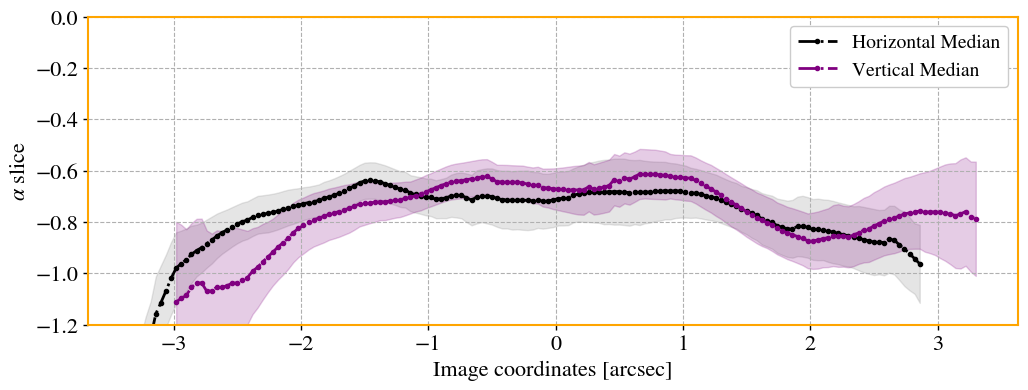

In [18]:
mlibs.plt.figure(figsize=(12,4))
# x_pixels = np.arange(alphaimage_error.shape[0])
x_pixels = np.arange(-alphaimage.shape[0]/2,+alphaimage.shape[0]/2)
x_profile = np.nanmedian(alphaimage,axis=0)
x_profile_error = np.nanmedian(alphaimage_error,axis=0)
y_profile = np.nanmedian(alphaimage,axis=1)
y_profile_error = np.nanmedian(alphaimage_error,axis=1)


mlibs.plt.plot(x_pixels*input_data.cell_size,x_profile,marker='.',linestyle='-.',
               color='black',label='Horizontal Median')
mlibs.plt.fill_between(x_pixels*input_data.cell_size,
                        x_profile - 3 * x_profile_error, 
                        x_profile + 3 * x_profile_error,
                        # label = 'rms error',
                        color='gray', alpha=0.2)


mlibs.plt.plot(x_pixels*input_data.cell_size,y_profile,marker='.',linestyle='-.',
               color='purple',label='Vertical Median')
mlibs.plt.fill_between(x_pixels*input_data.cell_size,
                        y_profile - 3 * y_profile_error, 
                        y_profile + 3 * y_profile_error,
                        # label = 'rms error',
                        color='purple', alpha=0.2)
mlibs.plt.legend()
# mlibs.plt.plot(np.nanmedian(alphaimage,axis=1),marker='.',linestyle='-.')
mlibs.plt.xlabel('Image coordinates [arcsec]')
mlibs.plt.ylabel(r'$\alpha$ slice')
mlibs.plt.ylim(-1.2,0.0)

## Non-thermal and thermal fraction maps.

Now, we can assume that the flux density is a function of synchrotron and free-free components:
$$ 
S_{\nu} = S_{\text{sy}} \ \left(\frac{\nu}{\nu_0}\right)^{\alpha_{\text{sy}}} + 
S_{\text{ff}} \ \left(\frac{\nu}{\nu_0}\right)^{-0.1}
$$

The function `mlibs.specidx_map_SY_FF` is similar to `mlibs.specidx_map`, but takes into account the above equation.

It accepts as input a list of images, corresponding residuals and the frequencies. Then, it will fit a SY+FF spectrum to each pixel, 
using a non-linear least squares fitting algorithm. 

100%|██████████| 18/18 [00:00<00:00, 67.94it/s]


PSF BEAM SIZE is --> 27 px
PSF IMAGE SIZE is --> 301 px
INFO: Using Elliptical Gaussian for Gaussian beam convolution.


2025-01-21 14:49:09	WARN	componentlist::close	componentlist closed
100%|██████████| 18081/18081 [00:42<00:00, 429.99it/s]


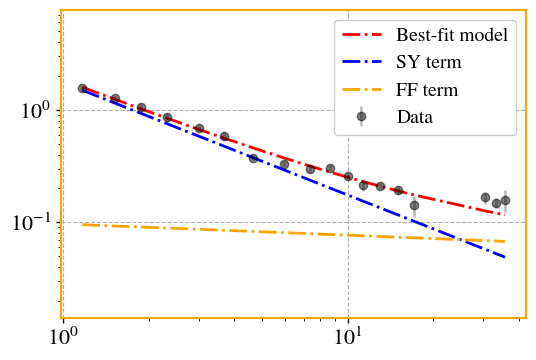

[[Variables]]
    A_sy:      0.17486965 +/- 0.03135488 (17.93%) (init = 0.1748697)
    A_ff:      0.07686403 +/- 0.03635028 (47.29%) (init = 0.07686403)
    alpha_nt: -0.99921075 +/- 0.07524191 (7.53%) (init = -0.9992108)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.991
    C(A_sy, A_ff)     = -0.952
    C(A_ff, alpha_nt) = -0.917


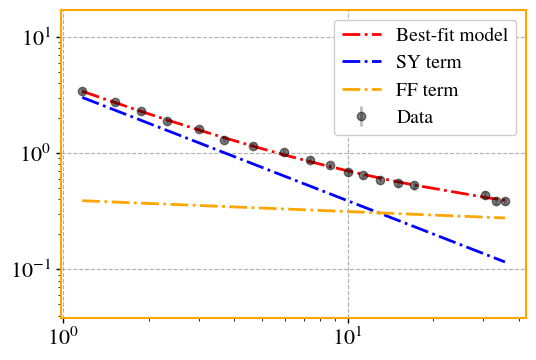

[[Variables]]
    A_sy:      0.38959840 +/- 0.02755063 (7.07%) (init = 0.3895984)
    A_ff:      0.31443169 +/- 0.03006634 (9.56%) (init = 0.3144317)
    alpha_nt: -0.95199768 +/- 0.02984637 (3.14%) (init = -0.9519977)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.989
    C(A_sy, A_ff)     = -0.950
    C(A_ff, alpha_nt) = -0.911


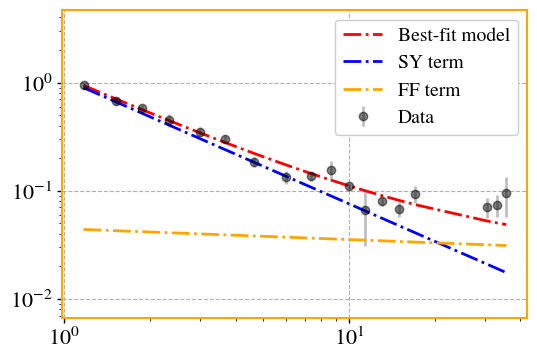

[[Variables]]
    A_sy:      0.07568149 +/- 0.01351482 (17.86%) (init = 0.07568149)
    A_ff:      0.03534257 +/- 0.01817173 (51.42%) (init = 0.03534257)
    alpha_nt: -1.15122676 +/- 0.07773609 (6.75%) (init = -1.151227)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.991
    C(A_sy, A_ff)     = -0.919
    C(A_ff, alpha_nt) = -0.876


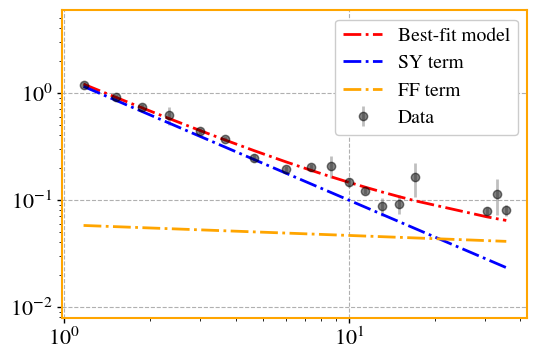

[[Variables]]
    A_sy:      0.09935927 +/- 0.01310142 (13.19%) (init = 0.09935927)
    A_ff:      0.04653782 +/- 0.01775494 (38.15%) (init = 0.04653783)
    alpha_nt: -1.13966674 +/- 0.05653933 (4.96%) (init = -1.139667)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.991
    C(A_sy, A_ff)     = -0.920
    C(A_ff, alpha_nt) = -0.877


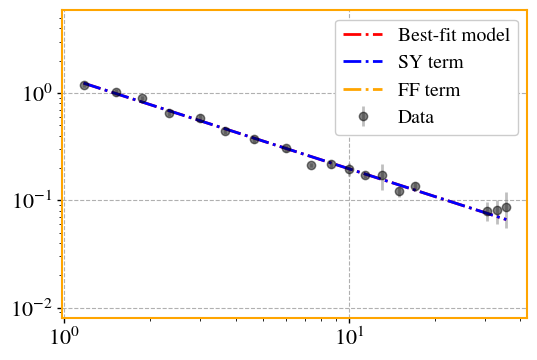

[[Variables]]
    A_sy:      0.19669396 +/- 0.04082867 (20.76%) (init = 0.196694)
    A_ff:      1.0000e-06 +/- 0.04587202 (4587201.60%) (init = 1e-06)
    alpha_nt: -0.85618180 +/- 0.08112733 (9.48%) (init = -0.8561818)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.991
    C(A_sy, A_ff)     = -0.973
    C(A_ff, alpha_nt) = -0.943


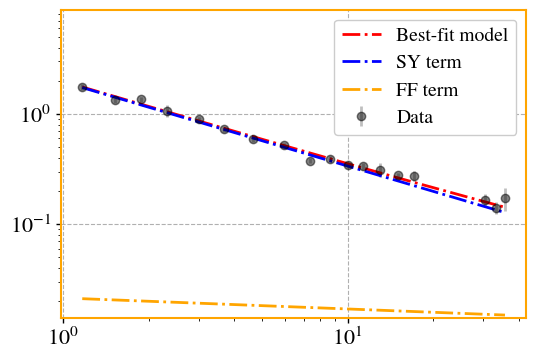

[[Variables]]
    A_sy:      0.33679891 +/- 0.07983087 (23.70%) (init = 0.3367989)
    A_ff:      0.01701373 +/- 0.08448111 (496.55%) (init = 0.01701372)
    alpha_nt: -0.76328672 +/- 0.08898577 (11.66%) (init = -0.7632867)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.989
    C(A_sy, A_ff)     = -0.982
    C(A_ff, alpha_nt) = -0.954


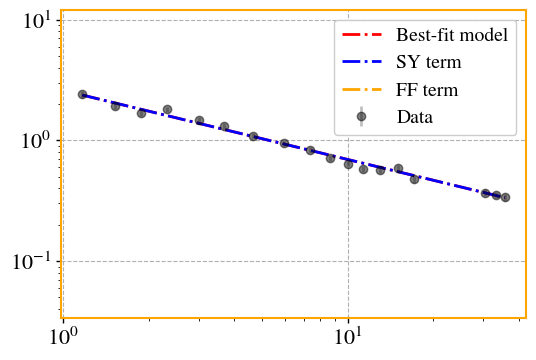

[[Variables]]
    A_sy:      0.69485533 +/- 0.22016762 (31.69%) (init = 0.6948553)
    A_ff:      1.0000e-06 +/- 0.21487014 (21487013.89%) (init = 1e-06)
    alpha_nt: -0.57263678 +/- 0.10419167 (18.20%) (init = -0.5726368)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, A_ff)     = -0.993
    C(A_sy, alpha_nt) = 0.988
    C(A_ff, alpha_nt) = -0.972


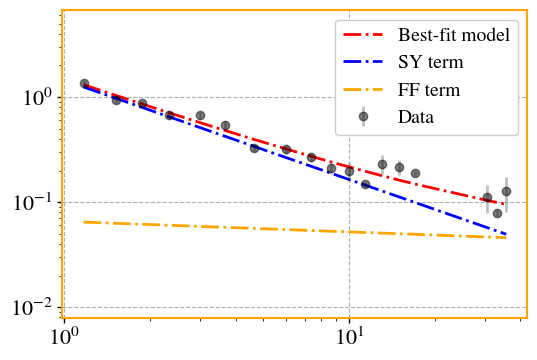

[[Variables]]
    A_sy:      0.16444724 +/- 0.04960683 (30.17%) (init = 0.1644472)
    A_ff:      0.05211418 +/- 0.05509409 (105.72%) (init = 0.05211419)
    alpha_nt: -0.94334287 +/- 0.12626393 (13.38%) (init = -0.9433429)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.989
    C(A_sy, A_ff)     = -0.951
    C(A_ff, alpha_nt) = -0.911


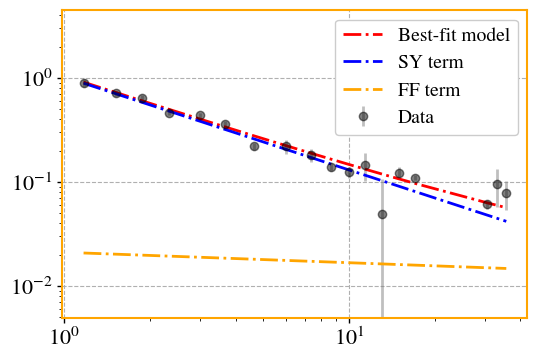

[[Variables]]
    A_sy:      0.13072285 +/- 0.02989955 (22.87%) (init = 0.1307229)
    A_ff:      0.01679256 +/- 0.03384188 (201.53%) (init = 0.01679255)
    alpha_nt: -0.89301610 +/- 0.09364650 (10.49%) (init = -0.8930161)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.988
    C(A_sy, A_ff)     = -0.957
    C(A_ff, alpha_nt) = -0.915


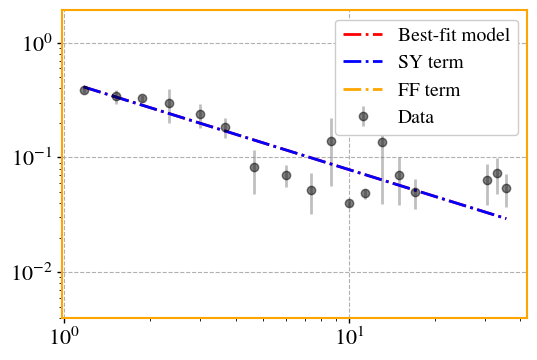

[[Variables]]
    A_sy:      0.07830613 +/- 0.05177503 (66.12%) (init = 0.07830613)
    A_ff:      1.0000e-06 +/- 0.05461391 (5461391.00%) (init = 1e-06)
    alpha_nt: -0.77324877 +/- 0.24469859 (31.65%) (init = -0.7732488)
[[Correlations]] (unreported correlations are < 0.100)
    C(A_sy, alpha_nt) = 0.993
    C(A_sy, A_ff)     = -0.976
    C(A_ff, alpha_nt) = -0.950


In [19]:

# %matplotlib inline
alphaimage_nth, alphaimage_nth_error,Snu0,Snu0_err,\
    A_ff_map, A_ff_map_err, A_sy_map, A_sy_map_err,\
    f_th_33,f_th_33_err,\
    conv_cube,masked_cube_res,masked_cube\
    = mlibs.specidx_map_SY_FF(imagelist_run,residuallist_run,
                              freqs=frequencies,
                              mask=ref_mask_cutout,
                              dilation_size=None,verbose=1,
                              n_jobs=8,
                              nu0=10,
                              sigma_global_mask=6,
                             )

<Figure size 500x500 with 0 Axes>

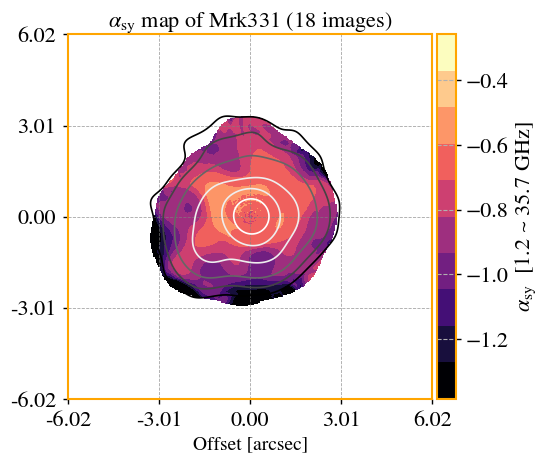

In [20]:
projection='offset'
box_size=(90,90)
crop=False

good_alpha_nth_mask = (alphaimage_nth_error<np.nanpercentile(alphaimage_nth_error, 86))
good_alpha_nth = np.where(good_alpha_nth_mask, alphaimage_nth, np.nan)
good_alpha_nth_error = np.where(good_alpha_nth_mask, alphaimage_nth_error, np.nan)

mlibs.plot_alpha_map(alphaimage=alphaimage_nth,
                     radio_map=MFS_images_c[idx_C_band],
                     figsize=(5,5),
                     plot_title=r'$\alpha_{\rm sy}$'f' map of {source_name}',cmap='magma',
                     rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[idx_C_band])),
                     vmax=np.nanmedian(alphaimage_nth) +3*mlibs.mad_std(alphaimage_nth,ignore_nan=True),
                     # vmin = -1.2,
                     vmin=np.nanmedian(alphaimage_nth) -3*mlibs.mad_std(alphaimage_nth,ignore_nan=True),
                     projection=projection,
                     box_size=box_size,crop=crop,
                     label_colorbar=r'$\alpha_{\rm sy}$  ',
                     frequencies=frequencies,
                     save_name=f'alpha_nth_map_{source_name}_lowres.pdf'
                    )

<Figure size 500x500 with 0 Axes>

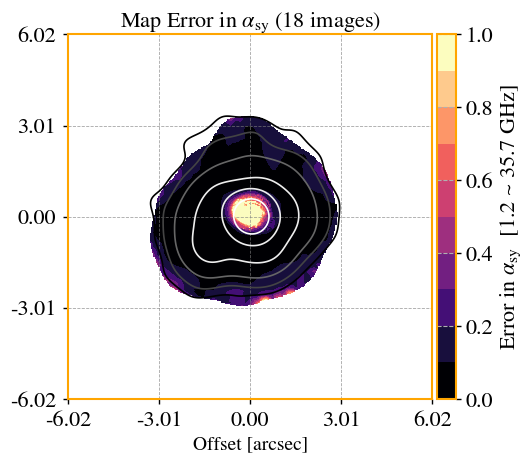

In [21]:
mlibs.plot_alpha_map(alphaimage=abs(alphaimage_nth*alphaimage_nth_error),figsize=(5, 5),
                     radio_map=MFS_images_c[idx_C_band],
                     plot_title=r'Map Error in $\alpha_{\rm sy}$',cmap='magma',
                     rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[idx_C_band])),
                     vmin=0,vmax=1,
                     projection=projection,
                     box_size=box_size,crop=crop,
                     # label_colorbar=r'$\varepsilon_{\alpha_{\rm nth}}$  ',
                     label_colorbar=r'Error in $\alpha_{\rm sy}$  ',
                     frequencies=frequencies,
                     save_name=f'alpha_nth_error_map_{source_name}_lowres.pdf'
                    )

<Figure size 500x500 with 0 Axes>

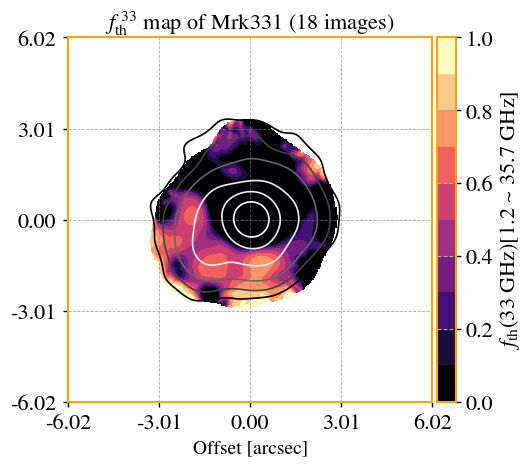

In [22]:
projection='offset'
box_size=(90,90)
crop=False

mlibs.plot_alpha_map(alphaimage=f_th_33,
                     radio_map=MFS_images_c[idx_C_band],
                     figsize=(5,5),
                     plot_title=r'$f_{\rm th}^{\ 33}$'f' map of {source_name}',cmap='magma',
                     rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[idx_C_band])),
                     vmax= 1.0,
                     vmin = 0.0,
                     projection=projection,
                     box_size=box_size,crop=crop,
                     label_colorbar=r'$f_{\rm th}(33 \ {\rm GHz})$',
                     frequencies=frequencies,
                     save_name=f'fth_map_{source_name}_lowres.pdf'
                    )

<Figure size 500x500 with 0 Axes>

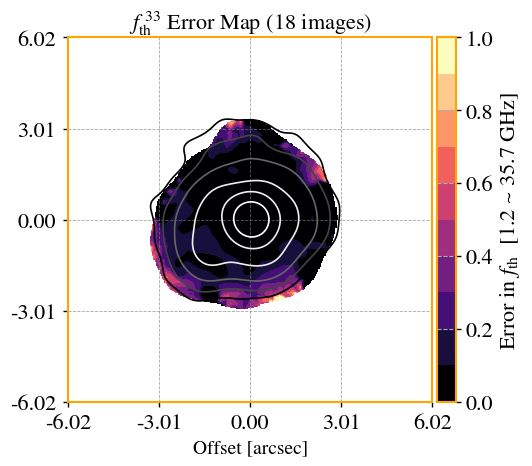

In [23]:
# reload_libs()
mlibs.plot_alpha_map(alphaimage=f_th_33*f_th_33_err,figsize=(5, 5),
                     radio_map=MFS_images_c[idx_C_band],
                     plot_title=r'$f_{\rm th}^{\ 33}$ Error Map',cmap='magma',
                     rms=mlibs.mad_std(mlibs.load_fits_data(MFS_residuals_c[idx_C_band])),
                     vmin=0,vmax=1,
                     projection=projection,
                     box_size=box_size,crop=crop,
                     label_colorbar=r'Error in $f_{\rm th}$  ',
                     frequencies=frequencies,
                     save_name=f'fth_map_map_{source_name}_lowres.pdf'
                    )

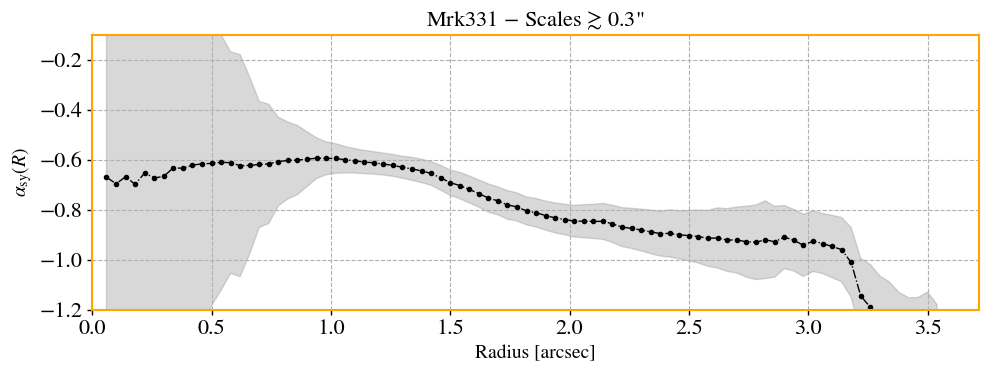

In [24]:
bin_centers, profile, error_rms, error_stdl,points_per_bin = \
    mlibs.plot_azimuthal_profile(image=alphaimage_nth,
                                 rms_image = abs(alphaimage_nth*alphaimage_nth_error),
                                 center=centre,log_scale=False,
                                 cell_size=mlibs.get_cell_size(MFS_images_c[idx_C_band]),
                                 ylabel=r'$\alpha_{\rm sy}(R)$',
                                 xlabel=r'Radius [arcsec]',
                                 figsize=(10,4),
                                 sigma=1.0,
                                 which_error='rms',which_statistics='median',
                                 weight_by_points=True,
                                 r_max = 4*mlibs.area_to_radii(np.sum(ref_mask_cutout)),
                                 title=f'{source_name} $-$ Scales $\gtrsim$ 0.3"'
                                )
# mlibs.plt.ylim(-1.2,np.nanpercentile(alphaimage,99.9))
mlibs.plt.ylim(-1.2,-0.1)
mlibs.plt.xlim(0,)
mlibs.plt.savefig(f'{source_name}_lr_alpha_nth_profile.pdf', dpi=600,
            bbox_inches='tight')

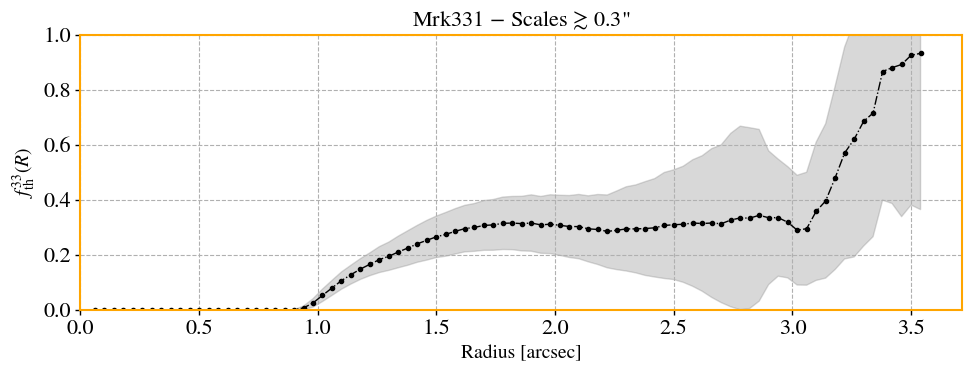

In [25]:
bin_centers, profile, error_rms, error_stdl,points_per_bin = \
    mlibs.plot_azimuthal_profile(image=f_th_33,
                                 rms_image = abs(f_th_33_err*f_th_33),
                                 center=centre,log_scale=False,
                                 cell_size=mlibs.get_cell_size(MFS_images_c[idx_C_band]),
                                 ylabel=r'$f_{\rm th}^{33}(R)$',
                                 xlabel=r'Radius [arcsec]',
                                 figsize=(10,4),
                                 sigma=1.0,
                                 which_error='rms',which_statistics='mean',
                                 weight_by_points=True,
                                 r_max = 4*mlibs.area_to_radii(np.sum(ref_mask_cutout)),
                                 title=f'{source_name} $-$ Scales $\gtrsim$ 0.3"'
                                )
# mlibs.plt.ylim(-1.2,np.nanpercentile(alphaimage,99.9))
mlibs.plt.ylim(0,1.0)
mlibs.plt.xlim(0,)
mlibs.plt.savefig(f'{source_name}_lr_fth_profile.pdf', dpi=600,
            bbox_inches='tight')